# Support Vector Regression

# Importing the library and dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Position_Salaries.csv')

In [ ]:
import os
# Get the current working directory
current_directory = os.getcwd()

# Print the full path of the current working directory
print("Current Working Directory:", current_directory)

Current Working Directory: /content


#Understanding the dataset

In [ ]:
df
# df.head() or df.tail()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
y=df.iloc[:,-1].values
x=df.iloc[:,1:-1].values
print(x.dtype)
print(x.shape)
print(x )
print(y.dtype)
print(y.shape)
print( y)

int64
(10, 1)
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
int64
(10,)
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
y=y.reshape(len(y),1)
print(y.dtype)
print(y.shape)
print( y)

int64
(10, 1)
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [ ]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


#Taking care of missing data

In [ ]:
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

#Encoding Categorical Variable

##Encoding independent Categorical Variable

##Encoding dependent Categorical Variable

#Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
# sc= StandardScaler()
sc_x = StandardScaler()
sc_y = StandardScaler()
# x2=sc.fit_transform(x)
x2=sc_x.fit_transform(x)
# y2=sc.fit_transform(y)
y2=sc_y.fit_transform(y)

In [ ]:
print(x2)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [ ]:
print(y2)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [ ]:
# print(y3)

#Split the dataset

#Training the SVR models on whole dataset

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel ='rbf')
regressor.fit(x2,y2)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

#Predicting a new result

In [ ]:
regressor.predict(sc_x.transform([[6.5]]))

array([-0.27861589])

In [ ]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

#Visualising the SVR Model

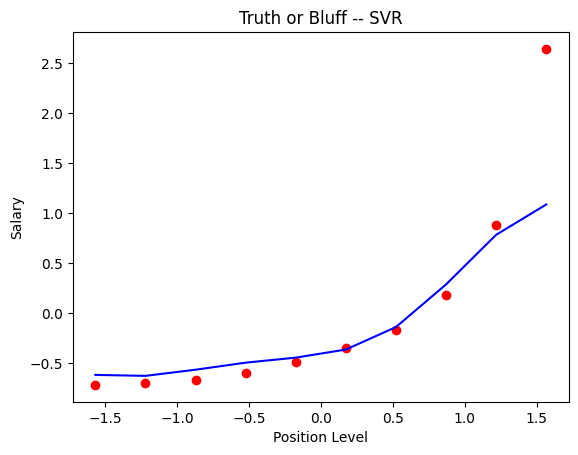

In [ ]:
plt.scatter(x2,y2,color='red')
plt.plot(x2,regressor.predict(x2).reshape(-1,1),color='blue')
plt.title("Truth or Bluff -- SVR")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

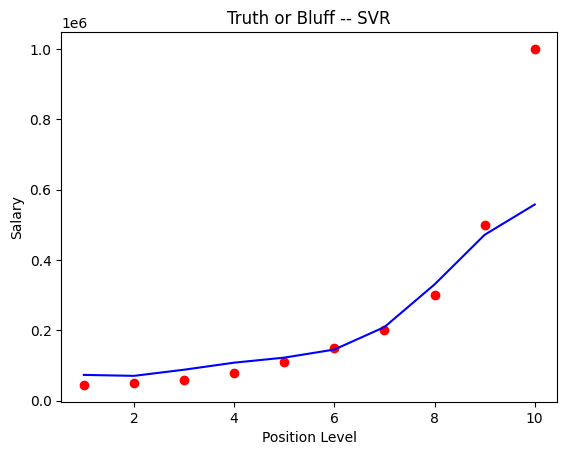

In [ ]:
plt.scatter(x,y,color='red')
plt.plot(x,sc_y.inverse_transform(regressor.predict(x2).reshape(-1,1)),color='blue')
plt.title("Truth or Bluff -- SVR")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

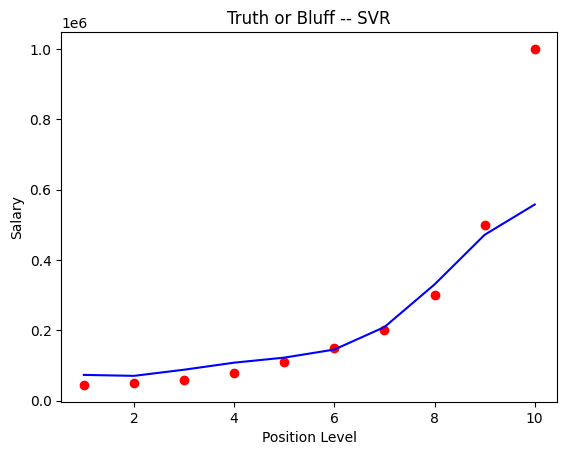

In [ ]:
plt.scatter(sc_x.inverse_transform(x2),sc_y.inverse_transform(y2),color='red')
plt.plot(sc_x.inverse_transform(x2),sc_y.inverse_transform(regressor.predict(x2).reshape(-1,1)),color='blue')
plt.title("Truth or Bluff -- SVR")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

#Visualising the SVR results ( for higher resolution and smoother curve)

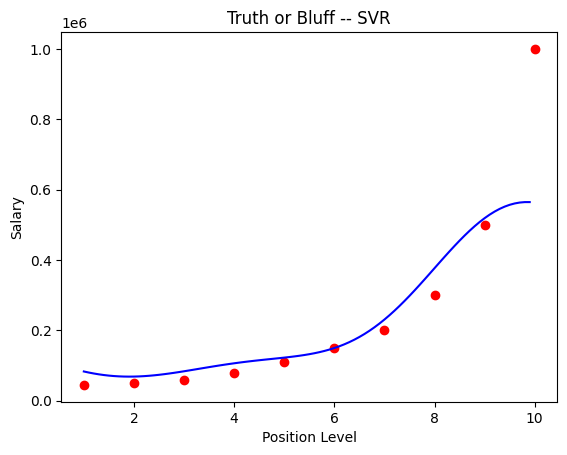

In [ ]:
x_grid = np.arange(min(x),max(x),0.1)
x_grid = x_grid.reshape(len(x_grid),1)
x_grid_fs = sc_x.fit_transform(x_grid)

plt.scatter(x,y,color='red')
plt.plot(x_grid,sc_y.inverse_transform(regressor.predict(x_grid_fs).reshape(-1,1)),color='blue')
plt.title("Truth or Bluff -- SVR")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()